In [1]:
import pandas as pd

In [2]:
t=pd.read_csv('titanic.csv')

In [3]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
t=t.drop(['PassengerId','Name','Cabin','Ticket','Embarked'], axis=1)

In [6]:
c=t['Sex']

In [7]:
c

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [8]:
c1=pd.get_dummies(c)

In [9]:
c1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [10]:
t=t.drop(['Sex'],axis=1)

In [11]:
t

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [12]:
f=[t,c1]

In [13]:
x=pd.concat(f,axis=1)

In [14]:
x

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,NaN,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [15]:
t['Age'].fillna(t['Age'].mean(),inplace=True)

In [16]:
t.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

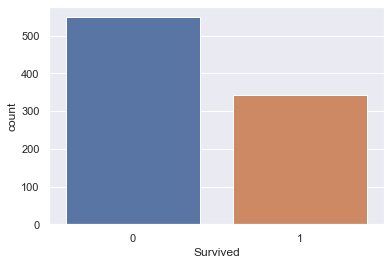

In [17]:
import seaborn as sns
sns.set()
sns.countplot(t['Survived'])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline



In [19]:
t.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [20]:
t.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

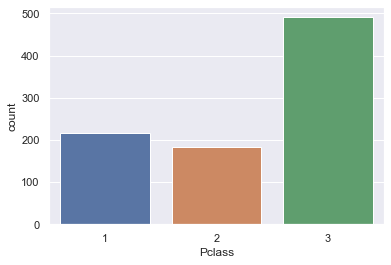

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(t['Pclass'])

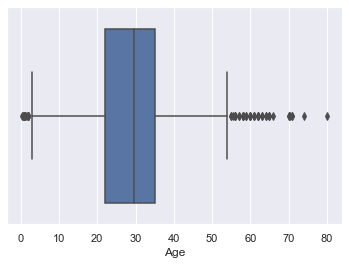

In [22]:
sns.boxplot(t['Age'])

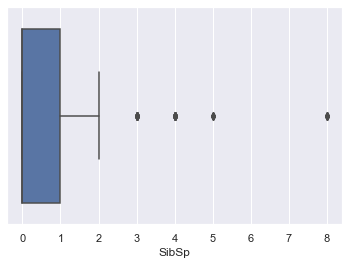

In [23]:
sns.boxplot(t['SibSp'])

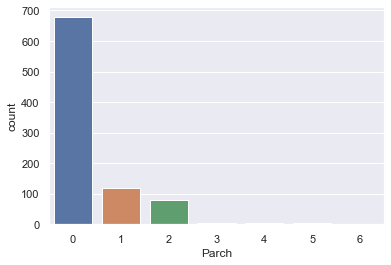

In [24]:
sns.countplot(t['Parch'])

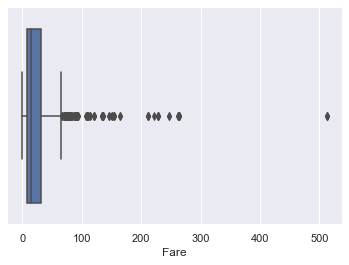

In [25]:
sns.boxplot(t['Fare'])

In [26]:
from scipy.stats import zscore
import numpy as np

In [27]:
z = np.abs(zscore(t))

In [28]:
z

array([[0.78927234, 0.82737724, 0.5924806 , 0.43279337, 0.47367361,
        0.50244517],
       [1.2669898 , 1.56610693, 0.63878901, 0.43279337, 0.47367361,
        0.78684529],
       [1.2669898 , 0.82737724, 0.2846632 , 0.4745452 , 0.47367361,
        0.48885426],
       ...,
       [0.78927234, 0.82737724, 0.        , 0.43279337, 2.00893337,
        0.17626324],
       [1.2669898 , 1.56610693, 0.2846632 , 0.4745452 , 0.47367361,
        0.04438104],
       [0.78927234, 0.82737724, 0.17706291, 0.4745452 , 0.47367361,
        0.49237783]])

In [29]:
print(np.where(z > 3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [30]:
t_z= t[(z < 3).all(axis=1)]


In [31]:
t_z

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [32]:
x=t_z.iloc[:,1:6]

In [33]:
x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [34]:
y=t_z['Survived']

In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.model_selection import cross_val_score

In [37]:
score=cross_val_score(lr, x, y, cv=5)


In [38]:
score

array([0.60365854, 0.68902439, 0.73170732, 0.75609756, 0.72560976])

In [39]:
score.mean()

0.7012195121951219

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix


In [45]:
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[150  23]
 [ 46  52]]


In [46]:
from sklearn.metrics import classification_report


In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.87      0.81       173
           1       0.69      0.53      0.60        98

    accuracy                           0.75       271
   macro avg       0.73      0.70      0.71       271
weighted avg       0.74      0.75      0.74       271



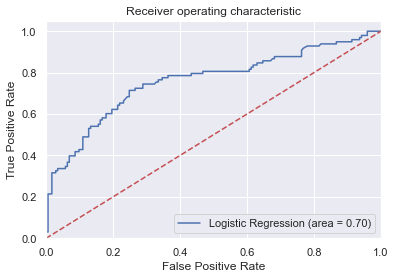

In [48]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()